<a href="https://colab.research.google.com/github/Cepeda-R/PythonTraining/blob/main/TrainingImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PREPARE PROJECT | DEPENDENCIES & LOAD DATA

In [ ]:
#!pip install tensorflow tensorflow-gpu opencv-python
#!pip install tf-nightly

!pip install tensorflow==2.7
!pip install opencv-python==4.1.2.30
#2.7 work with CNN Training Model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 489.6 MB 26 kB/s 
     |████████████████████████████████| 1.3 MB 64.9 MB/s 
     |████████████████████████████████| 463 kB 71.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.3 MB 1.3 MB/s 
  Attempting uninstall: opencv-python
    Foun

In [ ]:
#big data treatment & Keras API
import tensorflow as tf

#data treatment (batches)
import pandas as pd
import numpy as np
import cv2 #image translation to array
import imghdr #image extension

#see images
import matplotlib.pyplot as plt

#directories
import os

#misc
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config IPCompleter.greedy=True

In [ ]:
data_dir = '/content/drive/MyDrive/#1Weather_ML_Project/dataset'
#confirm features
os.listdir(data_dir)
#confirm sub_features
#os.listdir(os.path.join(data_dir, 'fogsmog'))

['sunny', 'rain', 'fogsmog', 'frost', 'snow', 'cloudy']

## TREAT DATA. Data treated do not use this more

In [ ]:
#quantity of files inside feature
totalFiles = 0

for base, dirs, files in os.walk(data_dir):
    for Files in files:
        totalFiles += 1
    print('Searching in : ', base, totalFiles)
    totalFiles = 0

Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset 0
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sunny 2096
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/rain 1990
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/fogsmog 2208
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/frost 1822
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/snow 2124
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/cloudy 2114


Learning os.remove function

In [ ]:
#this variable os.listdir point to a directory, not an absolute file
a = os.listdir(os.path.join(data_dir, 'sunny'))

absolute path

In [ ]:
#in an absolute string it was able to remove it
#os.remove('/content/drive/MyDrive/#1Weather_ML_Project/dataset/fogsmog/4076.jpg')

absolute variable

In [ ]:
#need to try in variable name
img_name = '1152.jpg'
#absolute path variable
image_removable = os.path.join(data_dir, 'sunny', img_name)
#os.remove(image_removable)

In [ ]:
if os.path.exists(image_removable):
    print('yo, it exists')
else:
    print('where is it??? its not here mate')

where is it??? its not here mate


In [ ]:
#used brake to understand concept before erasing data
image_exts = ['jpg', 'jpeg']
#gave a name for every features and every image
for features in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, features)):
        image_path = os.path.join(data_dir, features, image)
        try:
            img = cv2.imread(image_path) #if its not a valid image
            ext = imghdr.what(image_path) #if its not a valid extension
            if ext not in image_exts:
                print('Image not in ext list', format(image_path))
                os.remove(image_path)
        except:
            print('Issue with image', format(image_path))
        

In [ ]:
#quantity of files inside feature
totalFiles_after = 0
features_qty = []

for base, dirs, files in os.walk(data_dir):
    for Files in files:
        totalFiles_after += 1
    features_qty.append(totalFiles_after)
    print('Searching in : ', base, totalFiles_after)
    totalFiles_after = 0

Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset 0
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/fogsmog 796
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/lightning 362
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/rain 502
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sandstorm 660
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/snow 579
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/cloudy 719
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sunny 903
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/hail 561
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/frost 458


In [ ]:
features_qty

[0, 796, 362, 502, 660, 579, 719, 903, 561, 458]

In [ ]:
features_qty = features_qty[1:]
features_average = int(np.mean(features_qty))

In [ ]:
features_average

615

In [ ]:
feature_name = os.listdir(data_dir)

iles = os.listdir('path/to/your/folder')
for file in files[:11]:
    os.remove(file)

In [ ]:
features_qty_before = features_qty

In [ ]:
features_qty_before

[796, 362, 502, 660, 579, 719, 903, 561, 458]

In [ ]:
from random import sample

#for loop to remove randomly files from features above average
for index, values in enumerate(features_qty):
    if values > features_average:
        print (values, feature_name[index])
        #define the index feature and place it in OS
        files_to_remove_dir = os.path.join(data_dir, feature_name[index])
        files_to_remove_os = os.listdir(files_to_remove_dir)
        #define the amount to remove by feature
        amount_to_remove = int(values-features_average)
        print(amount_to_remove)
        #removing the amount define beforehand in a for loop
        for image_to_remove in sample(files_to_remove_os, amount_to_remove):
            print('it will be removed', image_to_remove)
            #apply image name into path to be removed
            img_to_rmv_path_dir = os.path.join(files_to_remove_dir, image_to_remove)
            print(img_to_rmv_path_dir)
            os.remove(img_to_rmv_path_dir)

In [ ]:
features_qty_before

[796, 362, 502, 660, 579, 719, 903, 561, 458]

In [ ]:
#quantity of files inside feature
totalFiles_after = 0
features_qty = []

for base, dirs, files in os.walk(data_dir):
    for Files in files:
        totalFiles_after += 1
    features_qty.append(totalFiles_after)
    print('Searching in : ', base, totalFiles_after)
    totalFiles_after = 0

Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset 0
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/fogsmog 615
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/lightning 362
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/rain 502
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sandstorm 615
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/snow 579
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/cloudy 615
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sunny 615
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/hail 561
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/frost 458


In [ ]:
#after
features_qty

[0, 615, 362, 502, 615, 579, 615, 615, 561, 458]

<function matplotlib.pyplot.show(*args, **kw)>

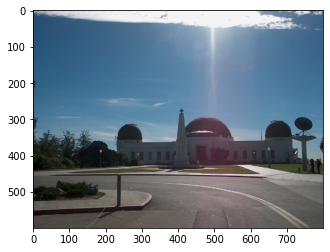

In [ ]:
#just to check
img = cv2.imread(os.path.join(files_to_remove_dir, '1153.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

## USING KERAS & BATCH

Use Keras Utils with Batch and Resize associated to the data

In [ ]:
#labels and classes already built with keras utils 
#plus batch size already in 32 and image size 256,256 + shuffle
#its a pipeline
#on the fly
Data = tf.keras.utils.image_dataset_from_directory(data_dir)
#transform data on the fly using numpy (to acess to it)
#this allows to loop
Data_Iterator = Data.as_numpy_iterator()
#this is allowing get one batch 
batch = Data_Iterator.next()

Found 3219 files belonging to 6 classes.


In [ ]:
batch[0].shape
#data_scaled = Data.map(lambda x,y: (x/256, y))
#x is images

(32, 256, 256, 3)

In [ ]:
batch[1][:32]

array([0, 2, 1, 3, 5, 4, 1, 1, 3, 4, 3, 5, 0, 2, 2, 0, 0, 3, 2, 0, 3, 5,
       3, 4, 1, 2, 2, 3, 2, 5, 0, 0], dtype=int32)

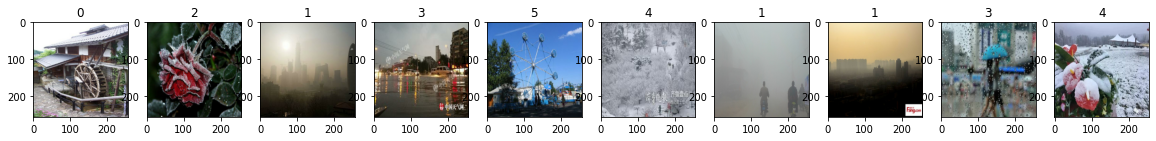

In [ ]:
#for i, ax in enumerate(axes.ravel())

#define layout chart
#need to improve this set - apply more rows and apply labels refering to number ID
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(20,20), squeeze=True)
#loop through batch. for every index and image
for idx, img in enumerate(batch[0][:10]):
    axs[idx].imshow(img.astype(int)) #doubt in astype int. Otherwise it would get exponents (not applicable by matplotlib)
    axs[idx].title.set_text(batch[1][idx])

*   0 cloudy
*   1 fogsmog
*   2 frost
*   3 rain
*   4 snow
*   5 sunny





Lets Split Data for Model Training

In [ ]:
#prevent out of memory error OOM
#this will be not use since we are using google colab
gpus = tf.config.experimental.list_physical_devices('GPU)')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import preprocessing

In [ ]:
#Improve Dataset, transforming images
imageaug = ImageDataGenerator(
    rotation_range=230,
    shear_range=0.1,
    zoom_range=0.1,
    vertical_flip=False,
)

In [ ]:
for i, classes in enumerate(os.listdir(data_dir)): #enumerate for transforming string in a integer. maintain another variable - classes
    fulldata_generator = imageaug.flow_from_directory(
        f'/content/drive/MyDrive/#1Weather_ML_Project/dataset/{classes}',
        batch_size=1000,
        class_mode='categorical',
        save_to_dir = f'/content/drive/MyDrive/#1Weather_ML_Project/dataset/{classes}/',
        save_prefix='aug',
        save_format='jpeg'
    )
    fulldata_generator.next()

Found 603 images belonging to 1 classes.
Found 455 images belonging to 1 classes.
Found 497 images belonging to 1 classes.
Found 561 images belonging to 1 classes.
Found 547 images belonging to 1 classes.
Found 556 images belonging to 1 classes.


In [ ]:
# this is the augmentation configuration we will use for training, can be use a lot of image treatment
train_datagen = ImageDataGenerator(rescale=1./256, validation_split=0.2)

# this is the augmentation configuration we will use for testing:
test_datagen = ImageDataGenerator(rescale=1./256, validation_split=0.2)

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(data_dir, subset = 'validation', batch_size=64)
train_generator = train_datagen.flow_from_directory(data_dir, subset= 'training', batch_size=64)

Found 2468 images belonging to 6 classes.
Found 9886 images belonging to 6 classes.


In [ ]:
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
#Standard CNN Model with Layers of Weights and a softmax at the end
standard_model = models.Sequential()
#standard_model.add(layers.AveragePooling2D((6,3), input_shape = [256, 256, 3])) #check block by block and reduce input shape size
standard_model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = [256, 256, 3]))
standard_model.add(layers.MaxPooling2D())
#standard_model.add(layers.Dropout(0.5)) #increase sampling and reduce overfitting
standard_model.add(layers.Conv2D(64, (2, 2), activation='relu'))
standard_model.add(layers.MaxPooling2D())
standard_model.add(layers.Conv2D(64, (2, 2), activation='relu'))
standard_model.add(layers.Flatten())
standard_model.add(layers.Dense(25, activation='relu'))
standard_model.add(layers.Dense(6, activation ='softmax')) #transform data into 9 parameters previously selected

In [ ]:
#opt_adam = keras.optimizers.Adam(learning_rate=0.01)
#compile model with type of optimizer, losses and metrics
standard_model.compile(optimizer= 'Adam',
             loss = 'CategoricalCrossentropy',
             metrics=['accuracy'])
#SparseCategoricalCrossentropy for integers
#CategoricalCrossentropy for one Hot Encoding
#binary_crossentropy
#KLDivergence

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                       patience=21,
                                       restore_best_weights=True)
#patience=1,

In [ ]:
standard_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_107 (Conv2D)         (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_108 (Conv2D)         (None, 62, 62, 64)        16448     
                                                                 
 flatten_22 (Flatten)        (None, 246016)          

In [ ]:
#124 samples of 32 batch size
#Train the model - the fun begins
standard_model.fit(train_generator, validation_data = validation_generator, epochs = 10, callbacks=callback)

Epoch 1/10
 97/155 [=================>............] - ETA: 39:29 - loss: 1.4430 - accuracy: 0.4298

In [ ]:
#Check Status - Performance
loss, accuracy = standard_model.evaluate(validation_generator)
print("Loss: ", loss)
print("Accuracy: ", accuracy)


10/10 [==============================] - 3s 264ms/step - loss: 2.6979 - accuracy: 0.6332
Loss:  2.6979215145111084
Accuracy:  0.6332288384437561


In [ ]:
#Saving Model for future Use
standard_model.save('/content/drive/MyDrive/#1Weather_ML_Project/?_MLModel_Weather_Check')

## TESTING MODEL


In [ ]:
#Upload Model for future Use
model = keras.models.load_model('/content/drive/MyDrive/#1Weather_ML_Project/76_MLModel_Weather_Check')

In [ ]:
test_dir = '/content/drive/MyDrive/#1Weather_ML_Project/Test'
#confirm features
os.listdir(test_dir)
#confirm sub_features
#os.listdir(os.path.join(data_dir, 'fogsmog'))

['Sunny.jpg',
 'Sunny2.jpg',
 'Rain.jpg',
 'frost.jpg',
 'snow.jpg',
 'inkscape.exe',
 'fogsmog.jpg',
 'cloudy.jpg']

In [ ]:
#import image and transform no numpy
import imageio

test_image1 = imageio.imread('/content/drive/MyDrive/#1Weather_ML_Project/Test/cloudy.jpg')
test_image_np = np.asarray(test_image1)
test_image_np = np.resize(test_image_np, (256, 256, 3))
test_image_np = np.expand_dims(test_image_np, axis=0)

In [ ]:
print(test_image_np.shape)

(1, 256, 256, 3)


In [ ]:
prediction = model.predict(test_image_np)

In [ ]:
print(prediction)

[[0. 0. 0. 1. 0. 0.]]


*   0 cloudy
*   1 fogsmog
*   2 frost
*   3 rain
*   4 snow
*   5 sunny





Create a function to translate integer to information

In [ ]:
weather_info = ['cloudy','fogsmog','frost','rain','snow','sunny']

weather_info = np.array(weather_info)

In [ ]:
prediction.shape

(1, 6)

In [ ]:
prediction_flatten = prediction.flatten()

In [ ]:
prediction_flatten.shape

(6,)

In [ ]:
result = np.where(prediction_flatten == 1)
result = result[0].astype(int)
weather_info[result][0]

'rain'

In [ ]:
weather_prediction_model = weather_info[result][0]
print('Weather Predicted Is : ', weather_prediction_model)

Weather Predicted Is :  rain


Next STEP: Improve Model Efficiency